<p>
Homework: https://work.caltech.edu/homework/hw1.pdf
<p>
Answers:
1. d
2. a
3. c —> d
4. b
5. c
6. e
7. b
8. c
9. b
10. b

<p>
Answer key: https://work.caltech.edu/homework/hw1_sol.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
class Line:
    '''A line that passes through the first two points of the given array'''
    def __init__(self, x1_s, x2_s, weights=None):
        if weights is not None:
            assert len(weights) == 3
            w0, w1, w2 = weights
            w0 /= w2
            w1 /= w2
            self.intercept = -w0
            self.slope = -w1
        else:
            assert len(x1_s) == 2
            assert len(x2_s) == 2
            self.slope = (x2_s[1]-x2_s[0])/(x1_s[1]-x1_s[0])
            self.intercept = x2_s[0] - self.slope * x1_s[0]
    
    def get_y(self, x):
        return self.intercept + self.slope * x
    
    def get_sign(self, x1, x2):
        return np.sign(- self.intercept - self.slope*x1 + x2 )
    
    def get_weights(self):
        return np.array([-self.intercept, -self.slope, 1])

In [3]:
x_min = -1
x_max = 1
y_min = x_min
y_max = x_max

([0.1408824937171127, 0.82255976986085577],
 [0.49962869723225301, -0.36191310078862915])

In [30]:
target_function_x = list(np.random.uniform(-1, 1, size=2))
target_function_y = list(np.random.uniform(-1, 1, size=2))
target_function_x, target_function_y

([0.32858062990294945, -0.71077797621206851],
 [0.97368510604400305, -0.95342052121733212])

In [ ]:
target_function = Line(target_function_x, target_function_y)

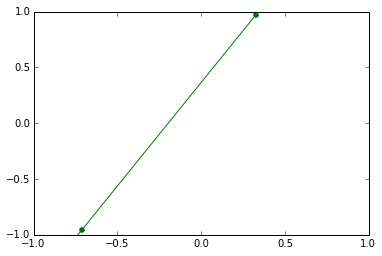

In [31]:
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(target_function_x, target_function_y, color='#006400')
plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')

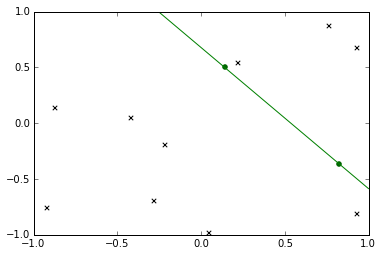

In [5]:
N = 10
sample_x1 = list(np.random.uniform(-1, 1, size=N))
sample_x2 = list(np.random.uniform(-1, 1, size=N))

In [ ]:
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(target_function_x, target_function_y, color='#006400')
plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
plt.scatter(sample_x1, sample_x2, color='black', marker='x')

In [6]:
sample_y = [target_function.get_sign(x1, x2) for x1, x2 in zip(sample_x1, sample_x2)]
sample_y

[1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0]

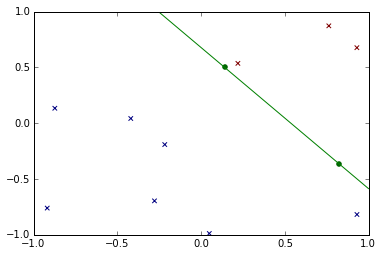

In [7]:
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(target_function_x, target_function_y, color='#006400')
plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

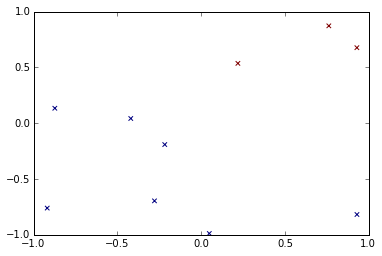

In [8]:
# Plot just the points without the target function
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

In [9]:
X = np.array([np.ones(N), sample_x1, sample_x2]).transpose()
X

array([[ 1.        ,  0.93050731,  0.67679148],
       [ 1.        ,  0.76285374,  0.87243506],
       [ 1.        , -0.91934058, -0.76061146],
       [ 1.        , -0.27854817, -0.69585465],
       [ 1.        , -0.42025229,  0.04218619],
       [ 1.        ,  0.93095918, -0.81809114],
       [ 1.        ,  0.21969419,  0.53605572],
       [ 1.        , -0.87394813,  0.13387922],
       [ 1.        ,  0.04887269, -0.98810955],
       [ 1.        , -0.21722968, -0.19135344]])

In [10]:
y = np.array(sample_y)
y

array([ 1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1.])

In [37]:
def PLA(X, y, max_iterations = 15000):
    
    w = np.array([0.0, 0.0, 0.0])
    iter = 0
    while iter < max_iterations:
        # print "Iteration {} w {}".format(iter, w)
        predictions = np.sign(np.dot(X, w))
        misclassfied = predictions != y
        if np.sum(misclassfied) == 0:
            break
        chosen = np.random.choice(np.where(misclassfied)[0])
        #print chosen, X[chosen], y[chosen], X[chosen] * y[chosen]
        w += X[chosen] * y[chosen]
        iter += 1

    return (iter+1 if iter < max_iterations else None, w)

PLA(X, y)

(5, array([ 0.        ,  0.63949461,  1.98875215]))

In [12]:
predicted_function = Line(None, None, w)

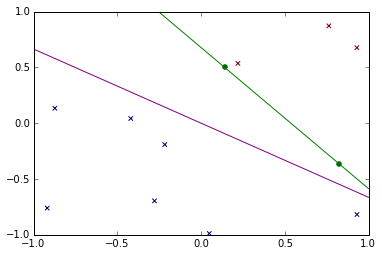

In [13]:
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(target_function_x, target_function_y, color='#006400')
plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
plt.plot([x_min, x_max], [predicted_function.get_y(x_min), predicted_function.get_y(x_max)], color='purple')
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

In [41]:
def score(target_function, predicted_function, large_N = 10000):
    test_sample_x1 = list(np.random.uniform(-1, 1, size=large_N))
    test_sample_x2 = list(np.random.uniform(-1, 1, size=large_N))
    test_sample_y = [target_function.get_sign(x1, x2) for x1, x2 in zip(test_sample_x1, test_sample_x2)]
    test_sample_y_pred = [predicted_function.get_sign(x1, x2) for x1, x2 in zip(test_sample_x1, test_sample_x2)]
    #display(test_sample_y)
    #display(test_sample_y_pred)
    return 1.0 * np.sum(np.array(test_sample_y) == np.array(test_sample_y_pred))/len(test_sample_y)

In [42]:
# Now do this thing in a loop
def percepteron_loop(N):
    target_function_x = list(np.random.uniform(-1, 1, size=2))
    target_function_y = list(np.random.uniform(-1, 1, size=2))
    target_function = Line(target_function_x, target_function_y)
    sample_x1 = list(np.random.uniform(-1, 1, size=N))
    sample_x2 = list(np.random.uniform(-1, 1, size=N))
    sample_y = [target_function.get_sign(x1, x2) for x1, x2 in zip(sample_x1, sample_x2)]
    X = np.array([np.ones(N), sample_x1, sample_x2]).transpose()
    y = np.array(sample_y)
    num_iter, weights = PLA(X, y)
    predicted_function = Line(None, None, weights)
    accuracy = score(target_function, predicted_function)
    return (num_iter, accuracy)

percepteron_loop(10)

(4, 0.8884)

In [48]:
def run_experiment(N, N_loops = 1000):
    num_iter_sum = 0.0
    accuracy_sum = 0.0
    for i in range(N_loops):
        num_iter, accuracy = percepteron_loop(N)
        num_iter_sum += num_iter
        accuracy_sum += accuracy
    avg_num_iter = num_iter_sum / N_loops
    avg_accuracy = accuracy_sum / N_loops
    return avg_num_iter, avg_accuracy

display(run_experiment(10))
display(run_experiment(100))

(14.424, 0.8028380000000003)

(113.8, 0.9702074999999999)

In [ ]:
#N = 10 : (10.675, 0.8101155000000002)
#N = 100 : (119.918, 0.972620799999999)